In [33]:
#region Basic_Import
## Basic
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.path.dirname(os.path.abspath('__file__'))
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from pandas import DataFrame, Series

import math, random

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score, rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

## 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm
import tqdm

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [34]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    from keras.models import Sequential, load_model
    from keras_flops import get_flops
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


## Data Load

In [35]:
## Raw Data Load
df_KIER_5Domain = pd.read_csv('KIER_Merged_5domain_2024-07-08.csv', index_col = 0)

data = df_KIER_5Domain.drop(['METER_DATE', 'YEAR'], axis=1)
back_data = df_KIER_5Domain.drop(['YEAR'], axis=1)

print(df_KIER_5Domain.columns)
df_KIER_5Domain

Index(['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'HOUR',
       'MINUTE', 'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity',
       'rainfall', 'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', 'sunshine',
       'solar_radiation', 'cloud_total', 'cloud_midlow', 'visual_range',
       'ELEC_INST', 'HEAT_INST', 'WATER_INST', 'HOT_INST', 'GAS_INST'],
      dtype='object')


METER_DATE  YEAR  MONTH  DAY  code_day_of_the_week  HOUR  \
0      2022-07-20 13:00:00  2022      7   20                     2    13   
1      2022-07-20 14:00:00  2022      7   20                     2    14   
2      2022-07-20 15:00:00  2022      7   20                     2    15   
3      2022-07-20 16:00:00  2022      7   20                     2    16   
4      2022-07-20 17:00:00  2022      7   20                     2    17   
...                    ...   ...    ...  ...                   ...   ...   
16408  2024-06-03 05:00:00  2024      6    3                     0     5   
16409  2024-06-03 06:00:00  2024      6    3                     0     6   
16410  2024-06-03 07:00:00  2024      6    3                     0     7   
16411  2024-06-03 08:00:00  2024      6    3                     0     8   
16412  2024-06-03 09:00:00  2024      6    3                     0     9   

       MINUTE  temp_outdoor  temp_dew_point   temp_ground  ...     sunshine  \
0           0 29.8000000000   21.4000000000 41.5000000000  ... 1.0000000000   
1           0 30.4000000000   20.0000000000 42.4000000000  ... 1.0000000000   
2           0 30.5000000000   21.0000000000 41.9000000000  ... 0.8000000000   
3           0 30.8000000000   20.7000000000 39.7000000000  ... 1.0000000000   
4           0 29.5000000000   20.0000000000 34.5000000000  ... 0.3000000000   
...       ...           ...             ...           ...  ...          ...   
16408       0 13.1000000000   10.8000000000 14.7000000000  ... 0.0000000000   
16409       0 13.7000000000   10.8000000000 15.0000000000  ... 0.1000000000   
16410       0 18.0000000000   11.9000000000 17.0000000000  ... 1.0000000000   
16411       0 19.7000000000   12.2000000000 22.5000000000  ... 1.0000000000   
16412       0 21.1000000000   12.2000000000 30.2000000000  ... 1.0000000000   

       solar_radiation  cloud_total  cloud_midlow    visual_range  \
0         2.8900000000 8.0000000000  2.0000000000 1903.0000000000   
1         2.8500000000 8.0000000000  1.0000000000 1986.0000000000   
2         2.3800000000 7.0000000000  2.0000000000 1985.0000000000   
3         2.1900000000 5.0000000000  3.0000000000 1993.0000000000   
4         1.0200000000 9.0000000000  1.0000000000 2000.0000000000   
...                ...          ...           ...             ...   
16408     0.0000000000 0.0000000000  0.0000000000 2976.0000000000   
16409     0.0500000000 0.0000000000  0.0000000000 3874.0000000000   
16410     0.5600000000 0.0000000000  0.0000000000 5000.0000000000   
16411     1.2500000000 0.0000000000  0.0000000000 5000.0000000000   
16412     1.9500000000 0.0000000000  0.0000000000 3955.0000000000   

           ELEC_INST    HEAT_INST    WATER_INST     HOT_INST     GAS_INST  
0     194.7787303232 0.0001975346  7.0350500000 0.0000093275 0.0000000000  
1     185.5468089258 0.0001975346  7.0453500000 0.0000031403 0.0003690685  
2     191.8368089258 0.0001975346  6.4400500000 0.0000034357 0.0102684149  
3     185.9038264696 0.0001975346  7.4170000000 0.0000072374 0.0218035922  
4     189.2517825136 0.0001975346 10.2510000000 0.0000123613 0.0218035922  
...              ...          ...           ...          ...          ...  
16408  80.6379999998 0.0000000000  6.0601202899 0.0000305033 0.0000000000  
16409  85.4079999998 0.0000000000  8.2929202899 0.0000944223 0.1200000000  
16410 111.6829999997 0.0000000000 11.7601202899 0.0002607810 0.3600000000  
16411 121.9929999998 0.0000000000  9.9387202899 0.0000540724 0.3800000000  
16412 122.4830000000 0.0000000000  6.3371202899 0.0000063394 0.3800000000  

[16413 rows x 29 columns]

##  For Scaling

In [36]:
scaler_data = MinMaxScaler()
scaler_data.fit(data)
scaled_data = scaler_data.transform(data)

new_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

elec_X = new_data.drop(['HEAT_INST','WATER_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
elec_Y = new_data[['ELEC_INST']].iloc[1:,]

heat_X = new_data.drop(['ELEC_INST','WATER_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
heat_Y = new_data[['HEAT_INST']].iloc[1:,]

water_X = new_data.drop(['ELEC_INST','HEAT_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
water_Y = new_data[['WATER_INST']].iloc[1:,]

hot_X = new_data.drop(['ELEC_INST','HEAT_INST', 'WATER_INST', 'GAS_INST'], axis=1).iloc[:-1,]
hot_Y = new_data[['HOT_INST']].iloc[1:,]

gas_X = new_data.drop(['ELEC_INST','HEAT_INST', 'WATER_INST', 'HOT_INST'], axis=1).iloc[:-1,]
gas_Y = new_data[['GAS_INST']].iloc[1:,]

trainX_elec, testX_elec, trainY_elec, testY_elec = train_test_split(elec_X, elec_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_heat, testX_heat, trainY_heat, testY_heat = train_test_split(heat_X, heat_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_water, testX_water, trainY_water, testY_water = train_test_split(water_X, water_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_hot, testX_hot, trainY_hot, testY_hot = train_test_split(hot_X, hot_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_gas, testX_gas, trainY_gas, testY_gas = train_test_split(gas_X, gas_Y, test_size=0.3, shuffle=False, random_state=0)

In [37]:
def buildDataSet(input, target, seqLength):
    xdata = []
    ydata = []
    for i in range(len(input) - seqLength):
        tx = input.iloc[i:i+seqLength]
        ty = target.iloc[i+seqLength-1]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)

In [38]:
trainx_elec, trainy_elec = buildDataSet(trainX_elec, trainY_elec, 24)
testx_elec, testy_elec = buildDataSet(testX_elec, testY_elec, 24)

trainx_heat, trainy_heat = buildDataSet(trainX_heat, trainY_heat, 24)
testx_heat, testy_heat = buildDataSet(testX_heat, testY_heat, 24)

trainx_water, trainy_water = buildDataSet(trainX_water, trainY_water, 24)
testx_water, testy_water = buildDataSet(testX_water, testY_water, 24)

trainx_hot, trainy_hot = buildDataSet(trainX_hot, trainY_hot, 24)
testx_hot, testy_hot = buildDataSet(testX_hot, testY_hot, 24)

trainx_gas, trainy_gas = buildDataSet(trainX_gas, trainY_gas, 24)
testx_gas, testy_gas = buildDataSet(testX_gas, testY_gas, 24)

In [39]:
def tl(model_name, target_x, target_y, path):
    src_model = load_model(str(model_name)+'.h5')
    for layer in src_model.layers[:4]:
        layer.trainable = False

    earlystopping = EarlyStopping(monitor='loss', patience=50)
    checkpoint = ModelCheckpoint(moniter='loss',filepath= path+'.h5')
    src_model.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
    
    # 모델 요약 정보 출력
    src_model.fit(target_x, target_y, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
    src_model.summary()

In [40]:
# 정규화 되돌리기 함수 
def back_MinMax(data, value):
    diff = np.max(data, axis=0)-np.min(data, axis=0)
    back = value * diff + np.min(data, axis=0)
    return back 

In [41]:
# def show_result(h5_name, testx_data, testy_data):
#     model_for_result = load_model(h5_name)
#     i = 0
#     if 'to_water' in h5_name: i = 1
#     elif 'to_hot' in h5_name: i = 2
#     elif 'to_elec' in h5_name: i = 3
    
        
#     pred = back_MinMax(back_data.to_numpy()[:,[-i]], np.reshape(model_for_result.predict(testx_data), (-1,1)))
#     real = back_MinMax(back_data.to_numpy()[:, [-i]], testy_data)
    
#     return pred, real, i

In [42]:
def show_result(h5_name, testx_data, testy_data):
    model_for_result = load_model(h5_name)
    i = 0
    if 'to_elec' in h5_name: i = 1
    elif 'to_heat' in h5_name: i = 2
    elif 'to_water' in h5_name: i = 3
    elif 'to_hot' in h5_name: i = 4
    elif 'to_gas' in h5_name: i = 5
    
        
    pred = back_MinMax(back_data.to_numpy()[:,[-i]], np.reshape(model_for_result.predict(testx_data), (-1,1)))
    real = back_MinMax(back_data.to_numpy()[:, [-i]], testy_data)
    
    return pred, real, i

In [43]:
# tl('s2s_elec', trainx_heat, trainy_heat, 's2s_elec_to_heat')
# tl('s2s_elec', trainx_water, trainy_water, 's2s_elec_to_water')
# tl('s2s_elec', trainx_hot, trainy_hot, 's2s_elec_to_hot')
# tl('s2s_elec', trainx_gas, trainy_gas, 's2s_elec_to_gas')

# tl('s2s_heat', trainx_elec, trainy_elec, 's2s_heat_to_elec')
# tl('s2s_heat', trainx_water, trainy_water, 's2s_heat_to_water')
# tl('s2s_heat', trainx_hot, trainy_hot, 's2s_heat_to_hot')
tl('s2s_heat', trainx_gas, trainy_gas, 's2s_heat_to_gas')

# tl('s2s_water', trainx_elec, trainy_elec, 's2s_water_to_elec')
# tl('s2s_water', trainx_heat, trainy_heat, 's2s_water_to_heat')
# tl('s2s_water', trainx_hot, trainy_hot, 's2s_water_to_hot')
# tl('s2s_water', trainx_gas, trainy_gas, 's2s_water_to_gas')

# tl('s2s_hot', trainx_elec, trainy_elec, 's2s_hot_to_elec')
# tl('s2s_hot', trainx_water, trainy_water, 's2s_hot_to_water')
# tl('s2s_hot', trainx_heat, trainy_heat, 's2s_hot_to_heat')
# tl('s2s_hot', trainx_gas, trainy_gas, 's2s_hot_to_gas')

# tl('s2s_gas', trainx_elec, trainy_elec, 's2s_gas_to_elec')
# tl('s2s_gas', trainx_water, trainy_water, 's2s_gas_to_water')
# tl('s2s_gas', trainx_heat, trainy_heat, 's2s_gas_to_heat')
# tl('s2s_gas', trainx_hot, trainy_hot, 's2s_gas_to_hot')

Epoch 1/300
45/45 [==============================] - 4s 22ms/step - loss: 0.0504 - mse: 0.0059
Epoch 2/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0464 - mse: 0.0054
Epoch 3/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0460 - mse: 0.0053
Epoch 4/300
45/45 [==============================] - 1s 19ms/step - loss: 0.0458 - mse: 0.0053
Epoch 5/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0455 - mse: 0.0052
Epoch 6/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0452 - mse: 0.0052
Epoch 7/300
45/45 [==============================] - 1s 17ms/step - loss: 0.0448 - mse: 0.0051
Epoch 8/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0447 - mse: 0.0051
Epoch 9/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0446 - mse: 0.0050
Epoch 10/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0446 - mse: 0.0050
Epoch 11/300
45/45 [=============================

In [44]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def mean_bias_error(true, pred):
    mbe_loss = np.sum(true - pred)/true.size
    return mbe_loss

## tar : ELEC

154/154 [==============================] - 2s 7ms/step
MAE :  0.0516
MAPE :  58363674136.8218
MSE :  0.0046
RMSE :  0.0676
MBE :  0.0012
R2 :  0.9317


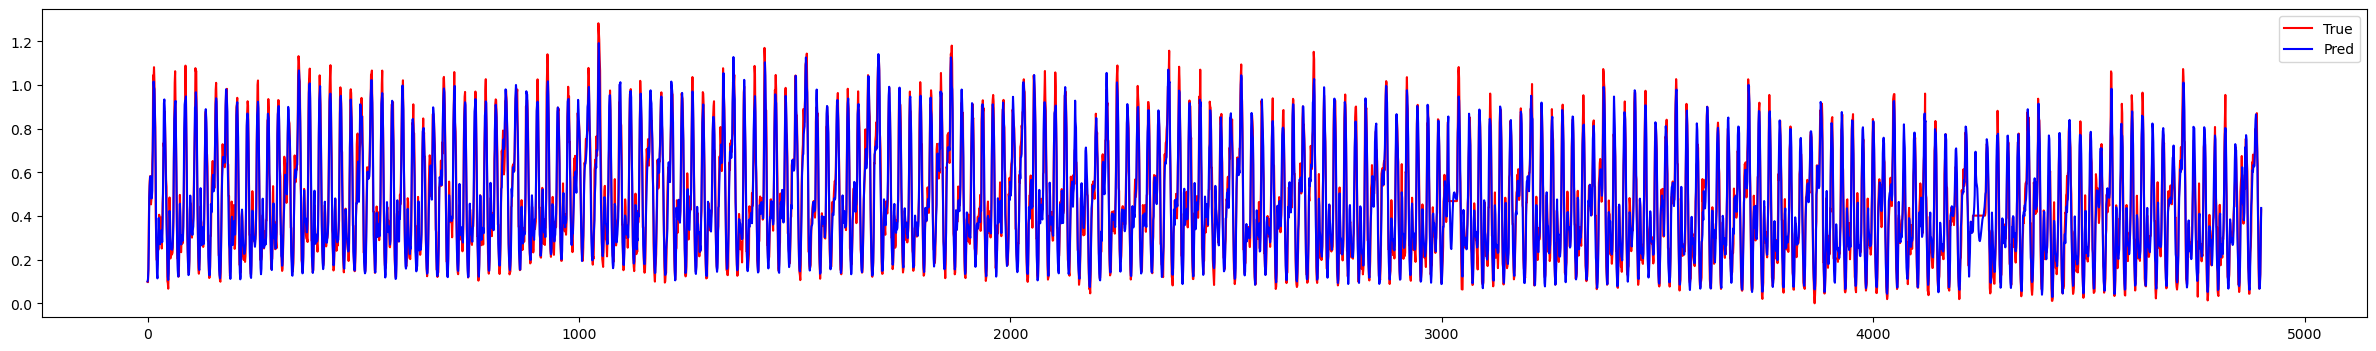

In [45]:
## HEAT To ELEC
pred_heat, real_heat, i = show_result('s2s_heat_to_elec.h5', testx_elec, testy_elec)

print('MAE : ', round(mean_absolute_error(real_heat, pred_heat),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_heat, pred_heat),4))
print('MSE : ', round(mean_squared_error(real_heat, pred_heat),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_heat, pred_heat)), 4))
print('MBE : ', round(mean_bias_error(real_heat, pred_heat), 4))
print('R2 : ', round(r2_score(real_heat, pred_heat),4))

plt.figure(figsize=(30,4))
plt.plot(real_heat, color='red', label='True')
plt.plot(pred_heat, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.0666
MAPE :  64420856397.8469
MSE :  0.008
RMSE :  0.0895
MBE :  0.0041
R2 :  0.8803


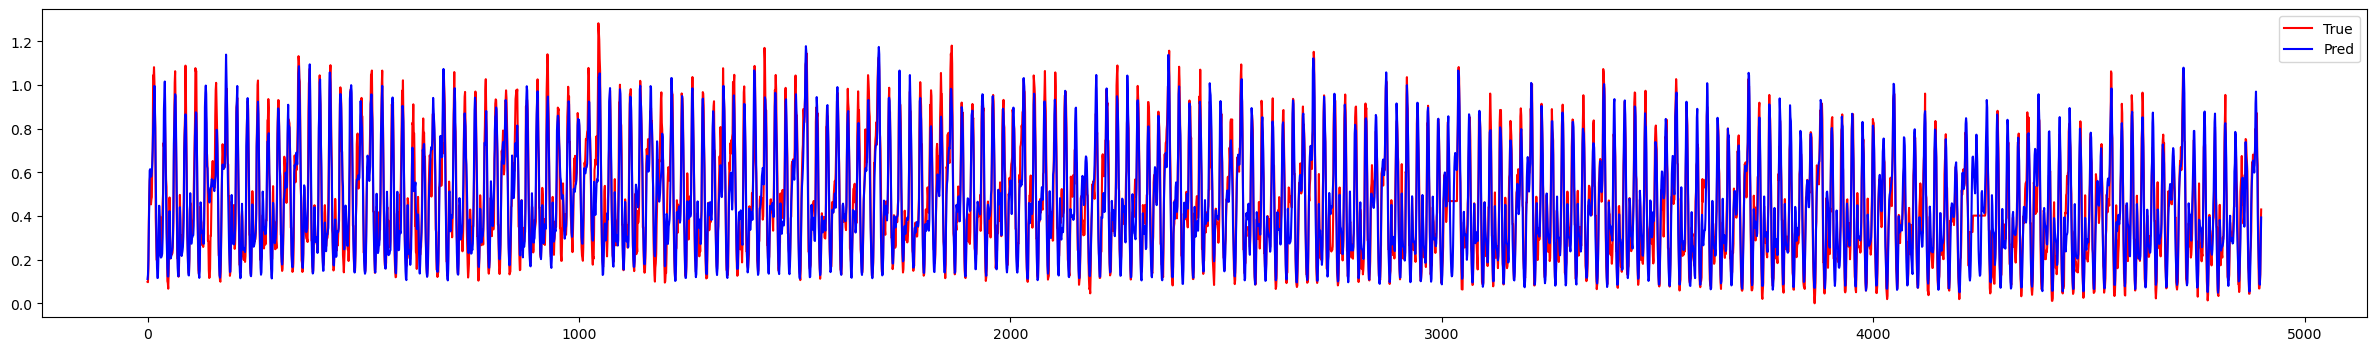

In [46]:
## WATER To ELEC
pred_water, real_water, i = show_result('s2s_water_to_elec.h5', testx_elec, testy_elec)

print('MAE : ', round(mean_absolute_error(real_water, pred_water),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_water, pred_water),4))
print('MSE : ', round(mean_squared_error(real_water, pred_water),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_water, pred_water)), 4))
print('MBE : ', round(mean_bias_error(real_water, pred_water), 4))
print('R2 : ', round(r2_score(real_water, pred_water),4))

plt.figure(figsize=(30,4))
plt.plot(real_water, color='red', label='True')
plt.plot(pred_water, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.0519
MAPE :  51887017434.4957
MSE :  0.0047
RMSE :  0.0686
MBE :  0.0036
R2 :  0.9296


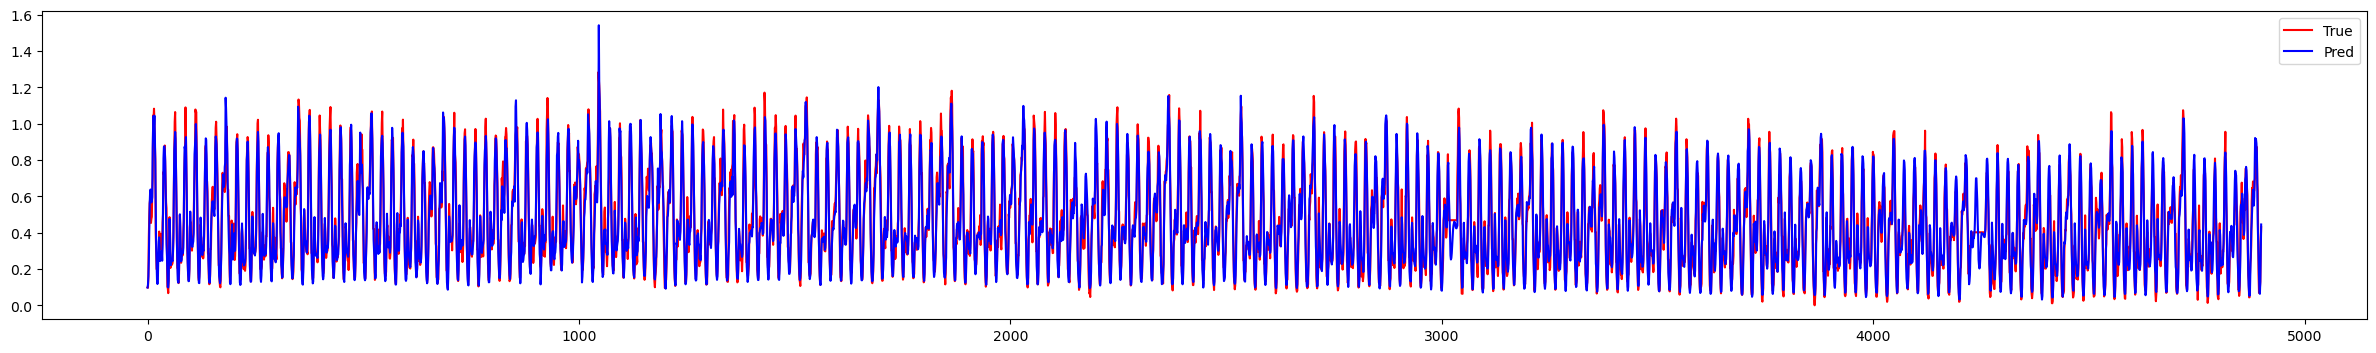

In [47]:
## HOT To ELEC
pred_hot, real_hot, i = show_result('s2s_hot_to_elec.h5', testx_elec, testy_elec)

print('MAE : ', round(mean_absolute_error(real_hot, pred_hot),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_hot, pred_hot),4))
print('MSE : ', round(mean_squared_error(real_hot, pred_hot),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_hot, pred_hot)), 4))
print('MBE : ', round(mean_bias_error(real_hot, pred_hot), 4))
print('R2 : ', round(r2_score(real_hot, pred_hot),4))

plt.figure(figsize=(30,4))
plt.plot(real_hot, color='red', label='True')
plt.plot(pred_hot, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.0583
MAPE :  82646652031.1968
MSE :  0.0057
RMSE :  0.0758
MBE :  -0.0078
R2 :  0.9141


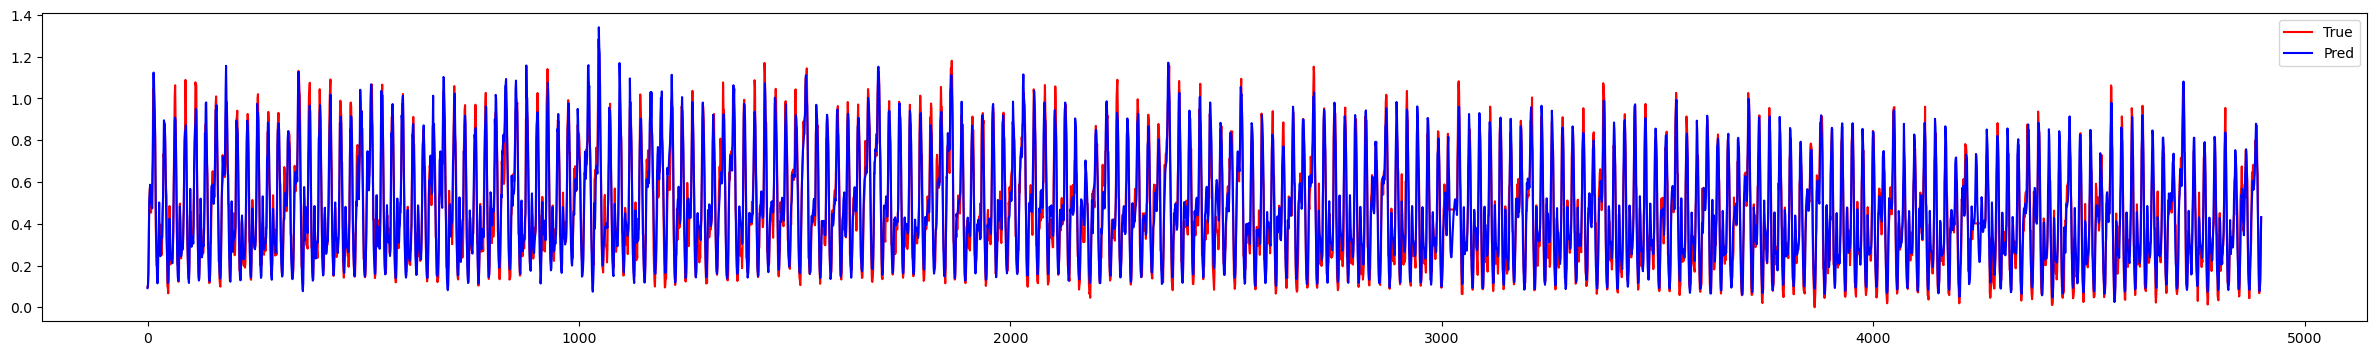

In [48]:
## GAS To ELEC
pred_gas, real_gas, i = show_result('s2s_gas_to_elec.h5', testx_elec, testy_elec)

print('MAE : ', round(mean_absolute_error(real_gas, pred_gas),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_gas, pred_gas),4))
print('MSE : ', round(mean_squared_error(real_gas, pred_gas),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_gas, pred_gas)), 4))
print('MBE : ', round(mean_bias_error(real_gas, pred_gas), 4))
print('R2 : ', round(r2_score(real_gas, pred_gas),4))

plt.figure(figsize=(30,4))
plt.plot(real_gas, color='red', label='True')
plt.plot(pred_gas, color='blue', label='Pred')
plt.legend()
plt.show()

## tar : HEAT

154/154 [==============================] - 2s 9ms/step
MAE :  0.0
MAPE :  1069.5278
MSE :  0.0
RMSE :  0.0
MBE :  0.0
R2 :  0.8609


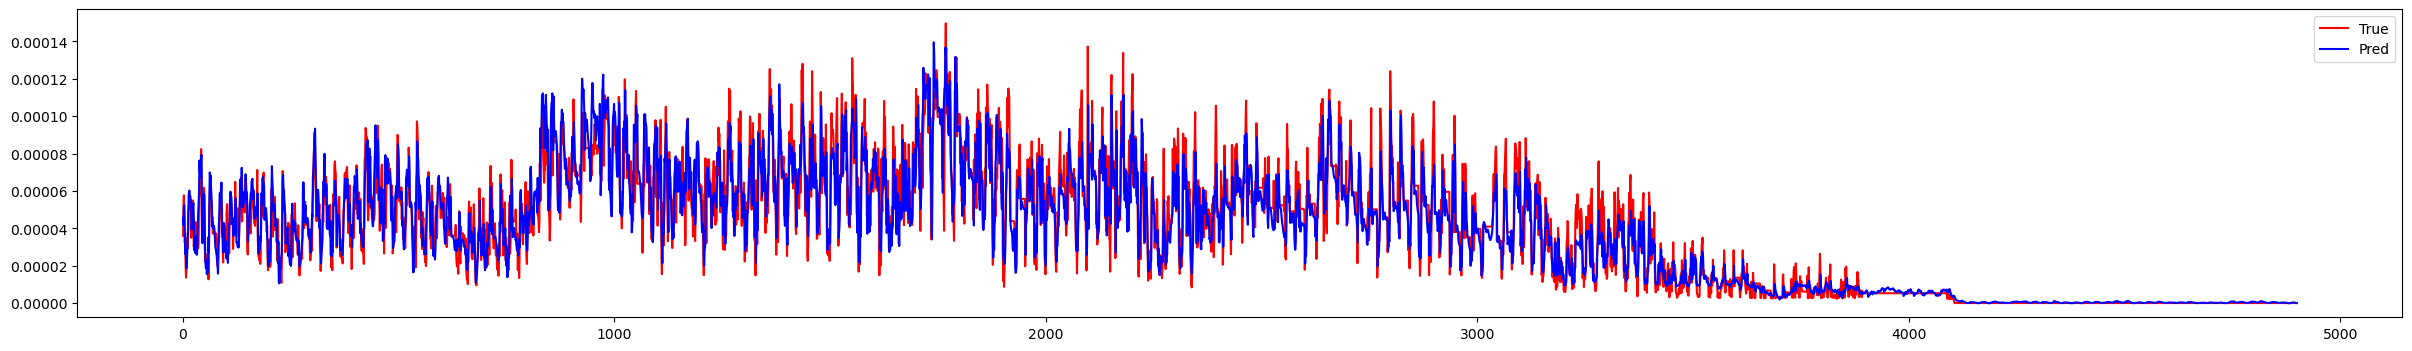

In [49]:
## ELEC To HEAT
pred_elec, real_elec, i = show_result('s2s_elec_to_heat.h5', testx_heat, testy_heat)

print('MAE : ', round(mean_absolute_error(real_elec, pred_elec),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_elec, pred_elec),4))
print('MSE : ', round(mean_squared_error(real_elec, pred_elec),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_elec, pred_elec)), 4))
print('MBE : ', round(mean_bias_error(real_elec, pred_elec), 4))
print('R2 : ', round(r2_score(real_elec, pred_elec),4))

plt.figure(figsize=(30,4))
plt.plot(real_elec, color='red', label='True')
plt.plot(pred_elec, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.0
MAPE :  26552.5635
MSE :  0.0
RMSE :  0.0
MBE :  -0.0
R2 :  0.5429


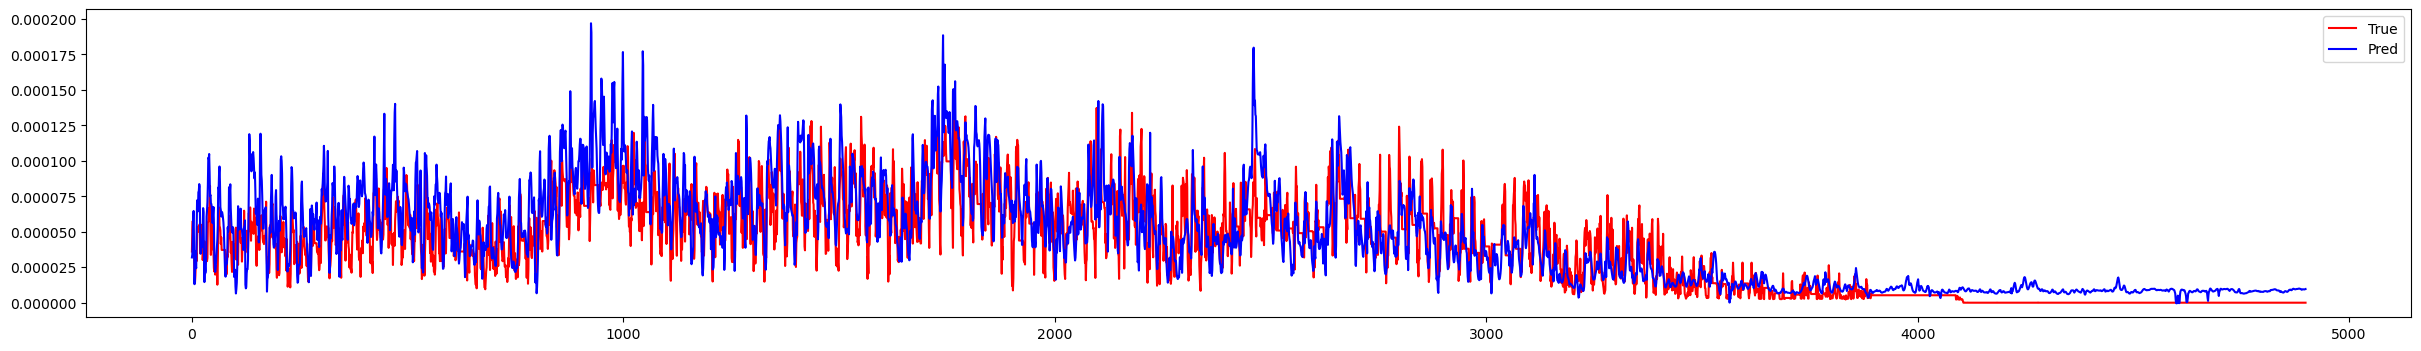

In [50]:
## WATER To HEAT
pred_water, real_water, i = show_result('s2s_water_to_heat.h5', testx_heat, testy_heat)

print('MAE : ', round(mean_absolute_error(real_water, pred_water),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_water, pred_water),4))
print('MSE : ', round(mean_squared_error(real_water, pred_water),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_water, pred_water)), 4))
print('MBE : ', round(mean_bias_error(real_water, pred_water), 4))
print('R2 : ', round(r2_score(real_water, pred_water),4))

plt.figure(figsize=(30,4))
plt.plot(real_water, color='red', label='True')
plt.plot(pred_water, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.0
MAPE :  5118.9728
MSE :  0.0
RMSE :  0.0
MBE :  -0.0
R2 :  0.8236


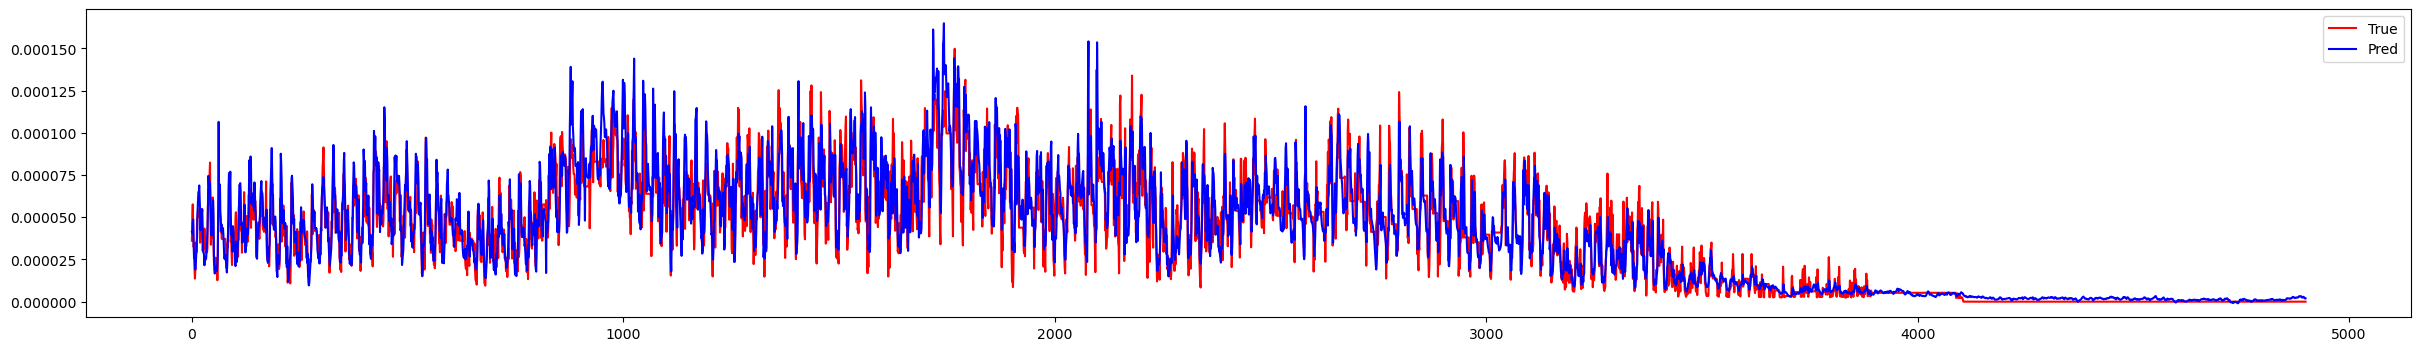

In [51]:
## HOT To HEAT
pred_hot, real_hot, i = show_result('s2s_hot_to_heat.h5', testx_heat, testy_heat)

print('MAE : ', round(mean_absolute_error(real_hot, pred_hot),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_hot, pred_hot),4))
print('MSE : ', round(mean_squared_error(real_hot, pred_hot),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_hot, pred_hot)), 4))
print('MBE : ', round(mean_bias_error(real_hot, pred_hot), 4))
print('R2 : ', round(r2_score(real_hot, pred_hot),4))

plt.figure(figsize=(30,4))
plt.plot(real_hot, color='red', label='True')
plt.plot(pred_hot, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.0
MAPE :  7174.008
MSE :  0.0
RMSE :  0.0
MBE :  -0.0
R2 :  0.6645


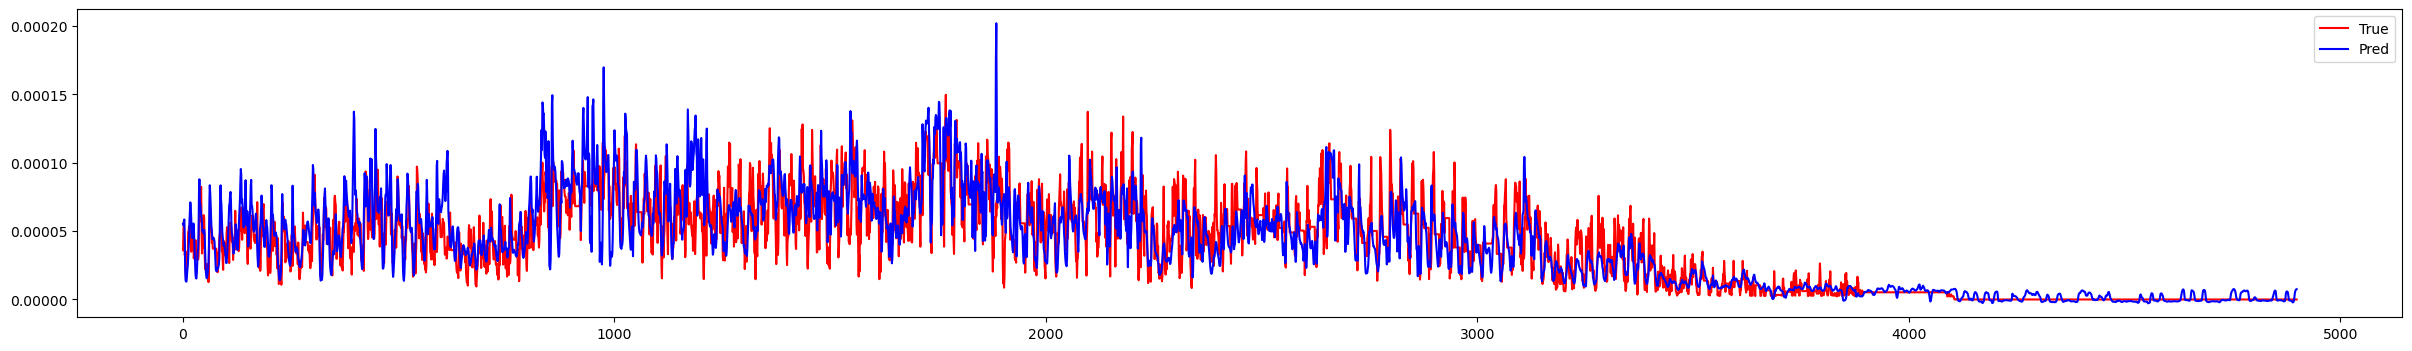

In [52]:
## GAS To HEAT
pred_gas, real_gas, i = show_result('s2s_gas_to_heat.h5', testx_heat, testy_heat)

print('MAE : ', round(mean_absolute_error(real_gas, pred_gas),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_gas, pred_gas),4))
print('MSE : ', round(mean_squared_error(real_gas, pred_gas),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_gas, pred_gas)), 4))
print('MBE : ', round(mean_bias_error(real_gas, pred_gas), 4))
print('R2 : ', round(r2_score(real_gas, pred_gas),4))

plt.figure(figsize=(30,4))
plt.plot(real_gas, color='red', label='True')
plt.plot(pred_gas, color='blue', label='Pred')
plt.legend()
plt.show()

## tar : WATER

154/154 [==============================] - 2s 7ms/step
MAE :  0.732
MAPE :  0.1398
MSE :  0.9473
RMSE :  0.9733
MBE :  0.0852
R2 :  0.8674


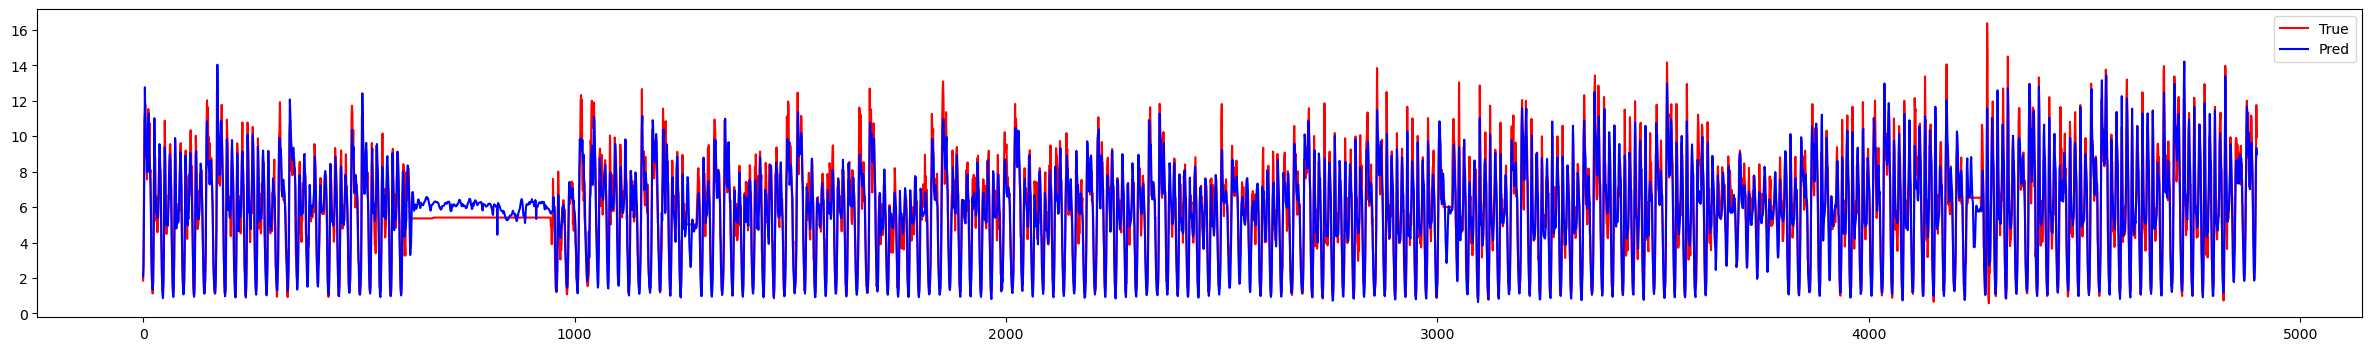

In [53]:
## ELEC To WATER
pred_elec, real_elec, i = show_result('s2s_elec_to_water.h5', testx_water, testy_water)

print('MAE : ', round(mean_absolute_error(real_elec, pred_elec),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_elec, pred_elec),4))
print('MSE : ', round(mean_squared_error(real_elec, pred_elec),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_elec, pred_elec)), 4))
print('MBE : ', round(mean_bias_error(real_elec, pred_elec), 4))
print('R2 : ', round(r2_score(real_elec, pred_elec),4))

plt.figure(figsize=(30,4))
plt.plot(real_elec, color='red', label='True')
plt.plot(pred_elec, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.7145
MAPE :  0.1369
MSE :  0.9285
RMSE :  0.9636
MBE :  0.1889
R2 :  0.8701


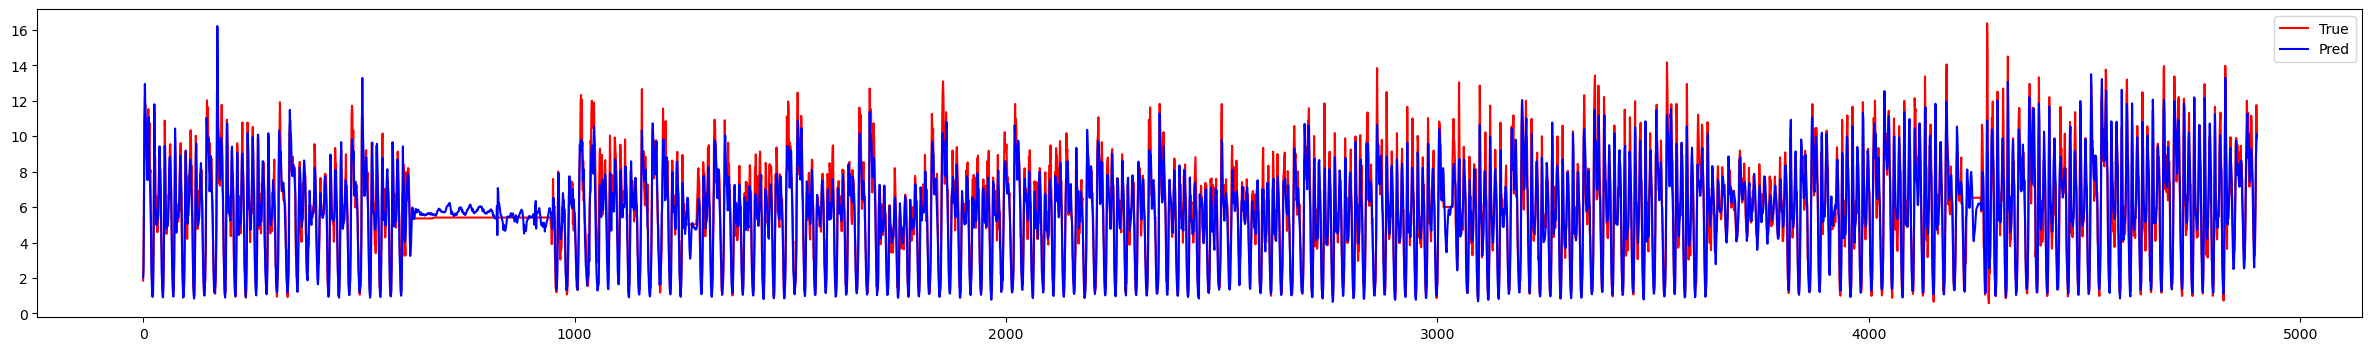

In [54]:
## HEAT To WATER
pred_heat, real_heat, i = show_result('s2s_heat_to_water.h5', testx_water, testy_water)

print('MAE : ', round(mean_absolute_error(real_heat, pred_heat),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_heat, pred_heat),4))
print('MSE : ', round(mean_squared_error(real_heat, pred_heat),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_heat, pred_heat)), 4))
print('MBE : ', round(mean_bias_error(real_heat, pred_heat), 4))
print('R2 : ', round(r2_score(real_heat, pred_heat),4))

plt.figure(figsize=(30,4))
plt.plot(real_heat, color='red', label='True')
plt.plot(pred_heat, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 8ms/step
MAE :  0.7359
MAPE :  0.1378
MSE :  0.9909
RMSE :  0.9954
MBE :  0.0462
R2 :  0.8613


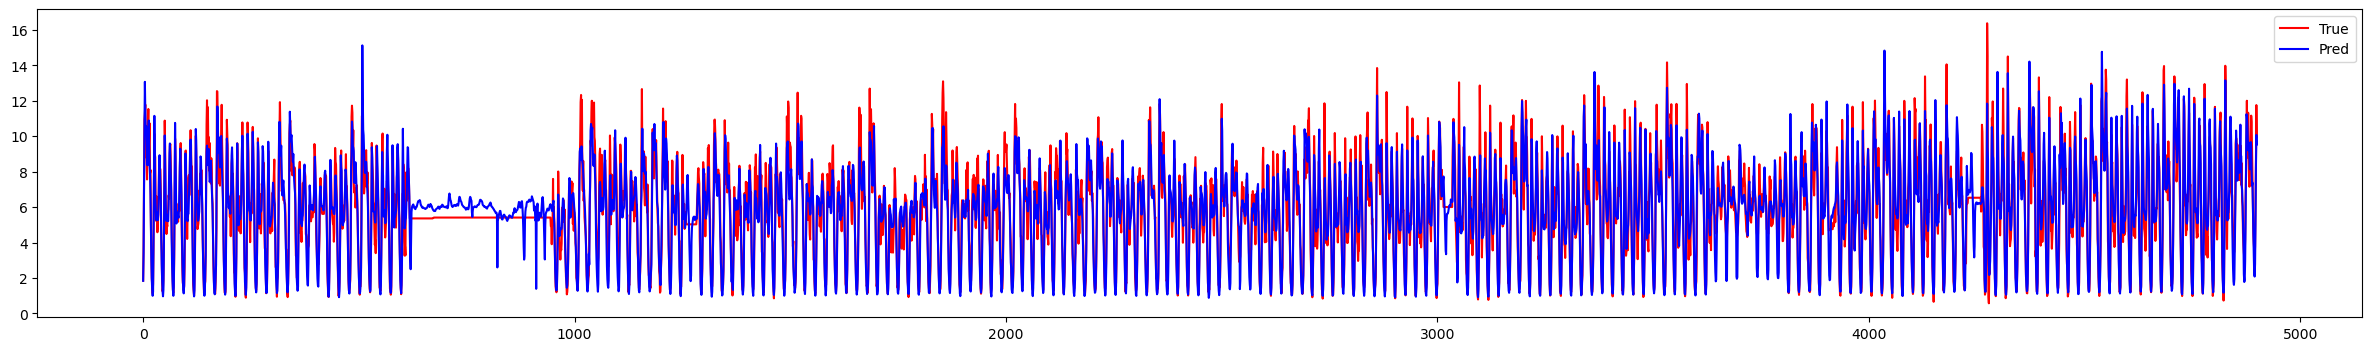

In [55]:
## HOT To WATER
pred_hot, real_hot, i = show_result('s2s_hot_to_water.h5', testx_water, testy_water)

print('MAE : ', round(mean_absolute_error(real_hot, pred_hot),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_hot, pred_hot),4))
print('MSE : ', round(mean_squared_error(real_hot, pred_hot),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_hot, pred_hot)), 4))
print('MBE : ', round(mean_bias_error(real_hot, pred_hot), 4))
print('R2 : ', round(r2_score(real_hot, pred_hot),4))

plt.figure(figsize=(30,4))
plt.plot(real_hot, color='red', label='True')
plt.plot(pred_hot, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.9058
MAPE :  0.1715
MSE :  1.5266
RMSE :  1.2356
MBE :  0.1172
R2 :  0.7863


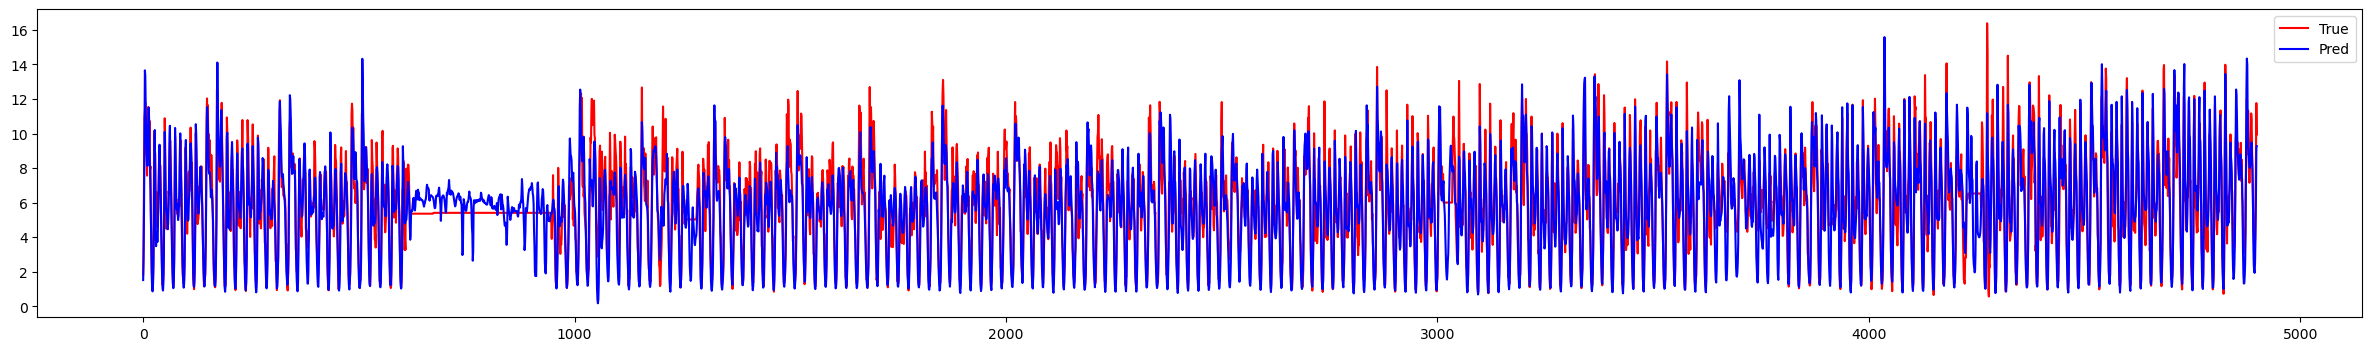

In [56]:
## GAS To WATER
pred_gas, real_gas, i = show_result('s2s_gas_to_water.h5', testx_water, testy_water)

print('MAE : ', round(mean_absolute_error(real_gas, pred_gas),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_gas, pred_gas),4))
print('MSE : ', round(mean_squared_error(real_gas, pred_gas),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_gas, pred_gas)), 4))
print('MBE : ', round(mean_bias_error(real_gas, pred_gas), 4))
print('R2 : ', round(r2_score(real_gas, pred_gas),4))

plt.figure(figsize=(30,4))
plt.plot(real_gas, color='red', label='True')
plt.plot(pred_gas, color='blue', label='Pred')
plt.legend()
plt.show()

## tar : HOT

154/154 [==============================] - 2s 7ms/step
MAE :  0.0485
MAPE :  1.0388
MSE :  0.0061
RMSE :  0.0781
MBE :  0.0054
R2 :  0.6791


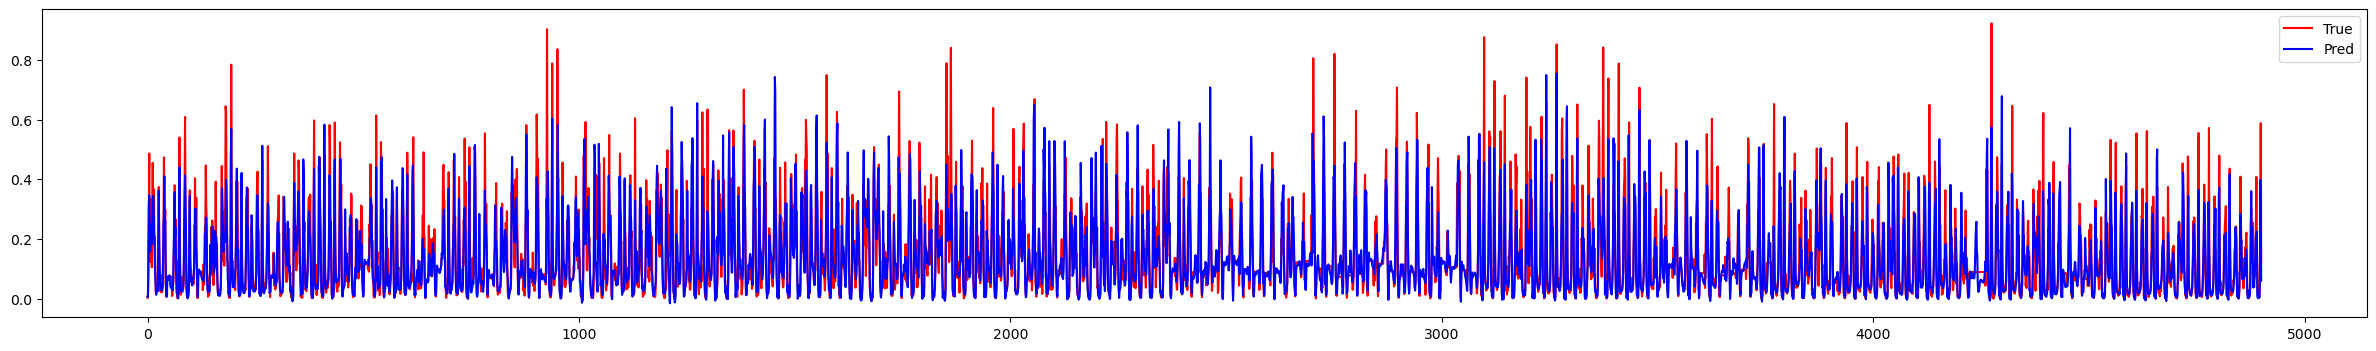

In [57]:
## ELEC To HOT
pred_elec, real_elec, i = show_result('s2s_elec_to_hot.h5', testx_hot, testy_hot)

print('MAE : ', round(mean_absolute_error(real_elec, pred_elec),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_elec, pred_elec),4))
print('MSE : ', round(mean_squared_error(real_elec, pred_elec),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_elec, pred_elec)), 4))
print('MBE : ', round(mean_bias_error(real_elec, pred_elec), 4))
print('R2 : ', round(r2_score(real_elec, pred_elec),4))

plt.figure(figsize=(30,4))
plt.plot(real_elec, color='red', label='True')
plt.plot(pred_elec, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 8ms/step
MAE :  4.6777
MAPE :  0.606
MSE :  57.4556
RMSE :  7.58
MBE :  3.0641
R2 :  0.4083


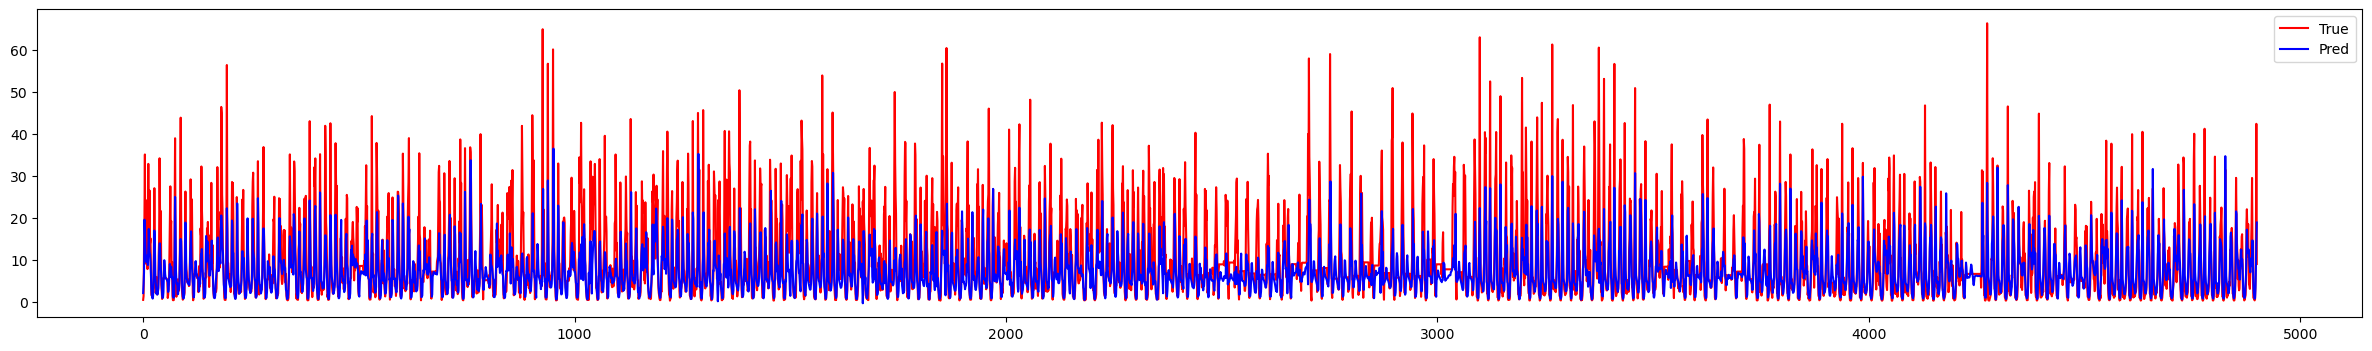

In [58]:
## HEAT To HOT
pred_heat, real_heat, i = show_result('s2s_hot_to_water.h5', testx_hot, testy_hot)

print('MAE : ', round(mean_absolute_error(real_heat, pred_heat),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_heat, pred_heat),4))
print('MSE : ', round(mean_squared_error(real_heat, pred_heat),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_heat, pred_heat)), 4))
print('MBE : ', round(mean_bias_error(real_heat, pred_heat), 4))
print('R2 : ', round(r2_score(real_heat, pred_heat),4))

plt.figure(figsize=(30,4))
plt.plot(real_heat, color='red', label='True')
plt.plot(pred_heat, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.0575
MAPE :  1.6246
MSE :  0.0083
RMSE :  0.0912
MBE :  0.0169
R2 :  0.563


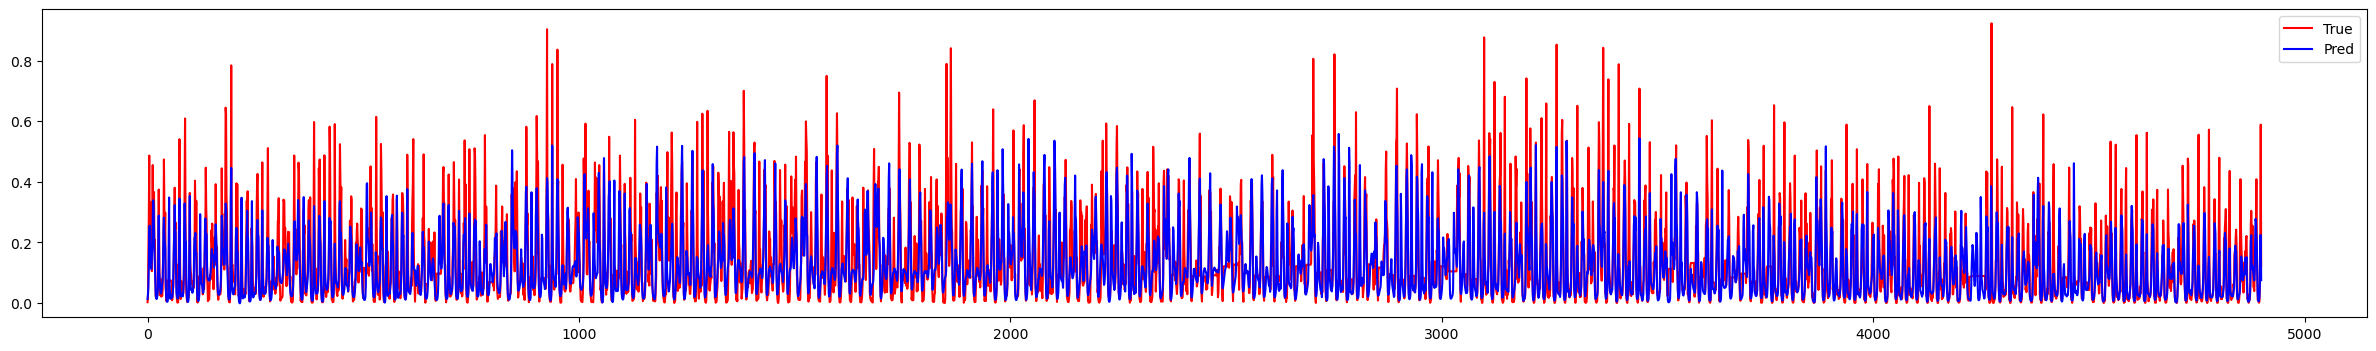

In [59]:
## WATER To HOT
pred_water, real_water, i = show_result('s2s_water_to_hot.h5', testx_hot, testy_hot)

print('MAE : ', round(mean_absolute_error(real_water, pred_water),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_water, pred_water),4))
print('MSE : ', round(mean_squared_error(real_water, pred_water),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_water, pred_water)), 4))
print('MBE : ', round(mean_bias_error(real_water, pred_water), 4))
print('R2 : ', round(r2_score(real_water, pred_water),4))

plt.figure(figsize=(30,4))
plt.plot(real_water, color='red', label='True')
plt.plot(pred_water, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  0.055
MAPE :  2.1336
MSE :  0.0075
RMSE :  0.0864
MBE :  0.005
R2 :  0.6072


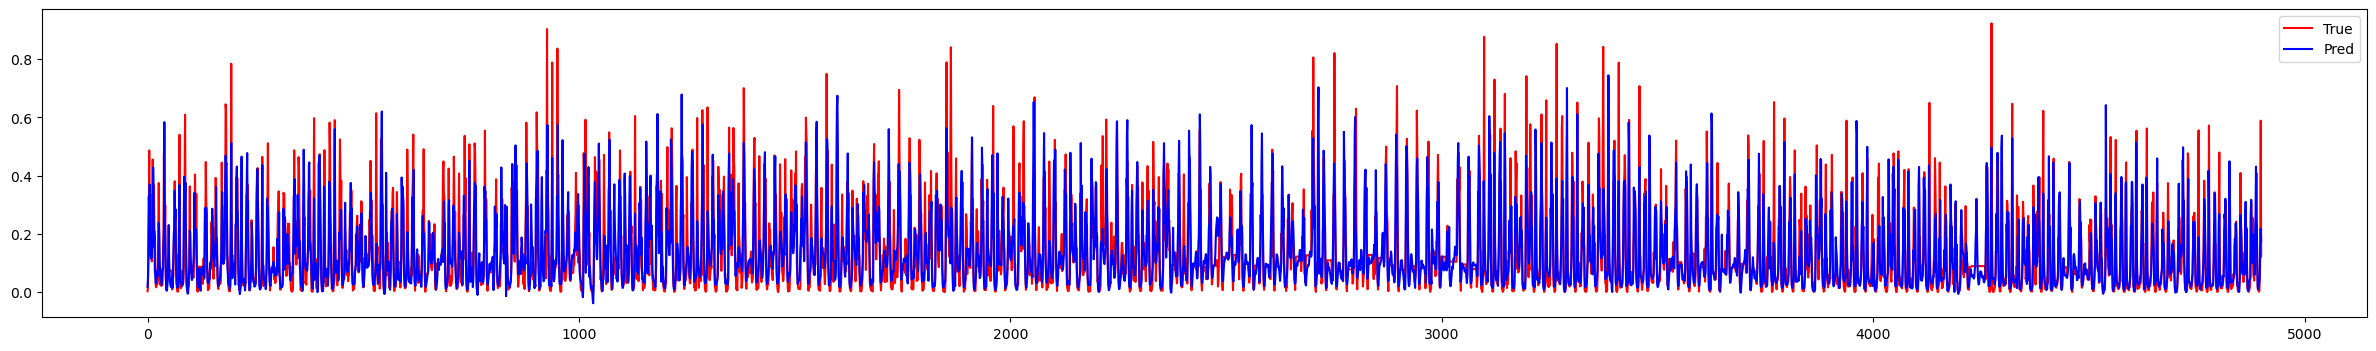

In [60]:
## GAS To HOT
pred_gas, real_gas, i = show_result('s2s_gas_to_hot.h5', testx_hot, testy_hot)

print('MAE : ', round(mean_absolute_error(real_gas, pred_gas),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_gas, pred_gas),4))
print('MSE : ', round(mean_squared_error(real_gas, pred_gas),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_gas, pred_gas)), 4))
print('MBE : ', round(mean_bias_error(real_gas, pred_gas), 4))
print('R2 : ', round(r2_score(real_gas, pred_gas),4))

plt.figure(figsize=(30,4))
plt.plot(real_gas, color='red', label='True')
plt.plot(pred_gas, color='blue', label='Pred')
plt.legend()
plt.show()

## tar : GAS

154/154 [==============================] - 2s 8ms/step
MAE :  17.5351
MAPE :  0.1089
MSE :  645.7774
RMSE :  25.4122
MBE :  -2.73
R2 :  0.4302


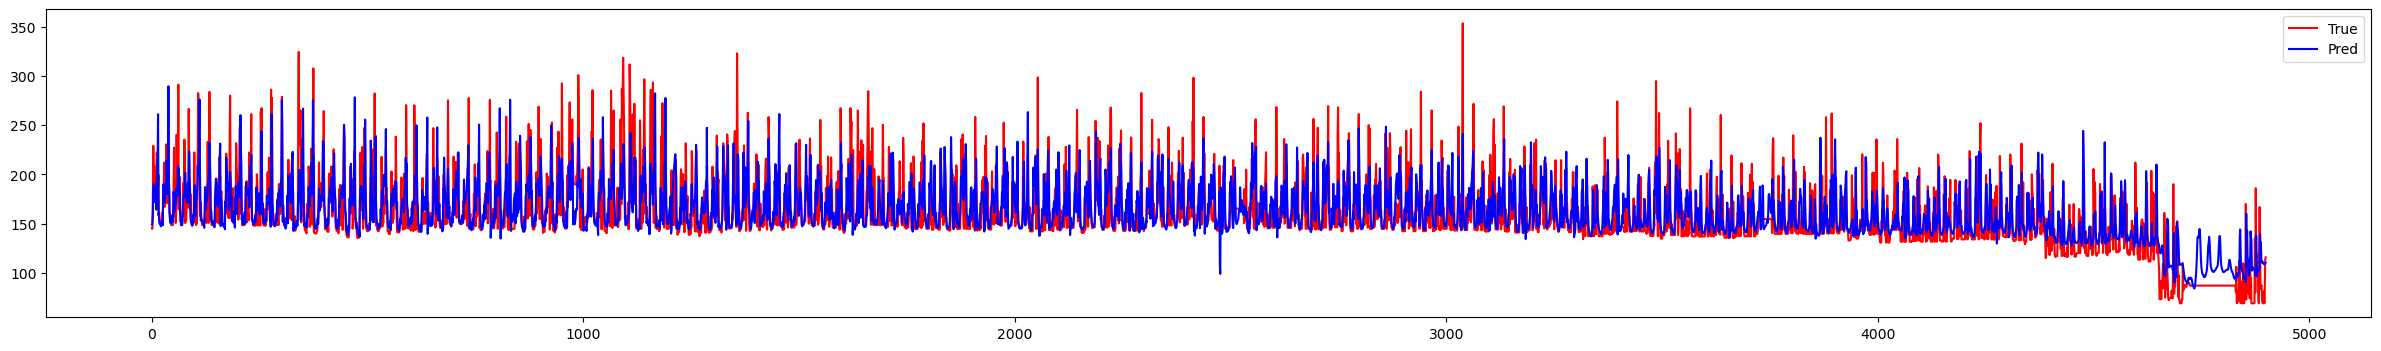

In [61]:
## ELEC To GAS
pred_elec, real_elec, i = show_result('s2s_elec_to_gas.h5', testx_gas, testy_gas)

print('MAE : ', round(mean_absolute_error(real_elec, pred_elec),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_elec, pred_elec),4))
print('MSE : ', round(mean_squared_error(real_elec, pred_elec),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_elec, pred_elec)), 4))
print('MBE : ', round(mean_bias_error(real_elec, pred_elec), 4))
print('R2 : ', round(r2_score(real_elec, pred_elec),4))

plt.figure(figsize=(30,4))
plt.plot(real_elec, color='red', label='True')
plt.plot(pred_elec, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  18.0636
MAPE :  0.1134
MSE :  622.2425
RMSE :  24.9448
MBE :  -4.8272
R2 :  0.451


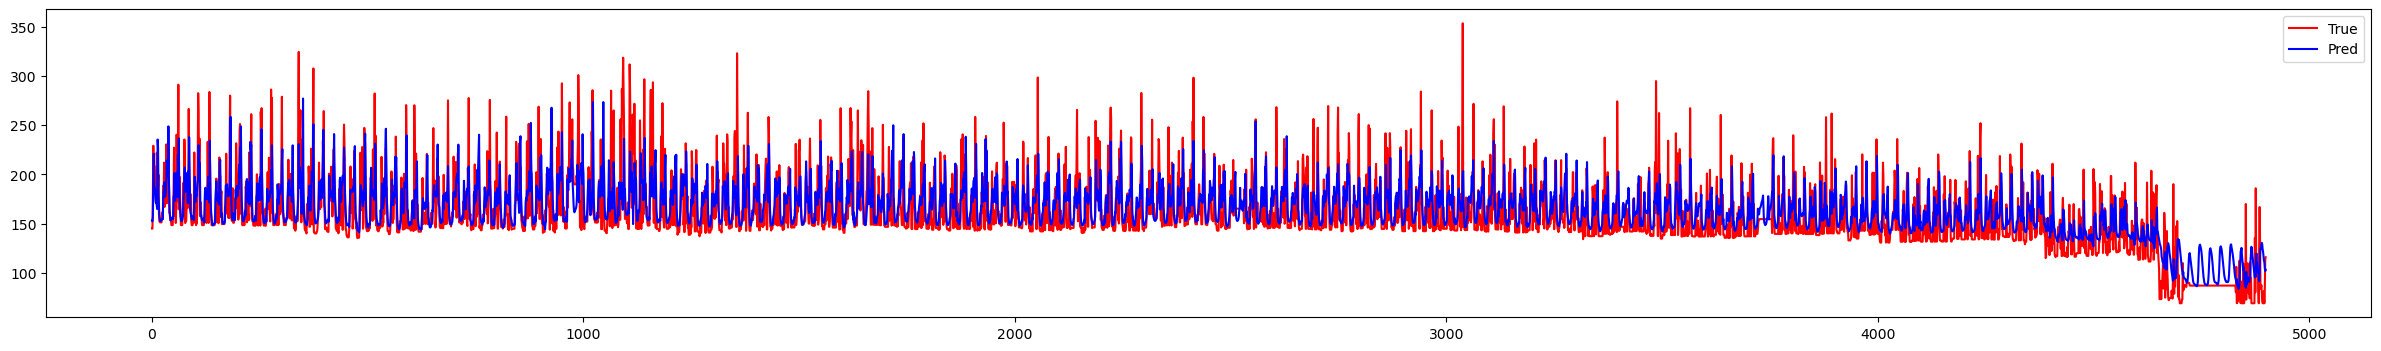

In [62]:
## HEAT To GAS
pred_heat, real_heat, i = show_result('s2s_heat_to_gas.h5', testx_gas, testy_gas)

print('MAE : ', round(mean_absolute_error(real_heat, pred_heat),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_heat, pred_heat),4))
print('MSE : ', round(mean_squared_error(real_heat, pred_heat),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_heat, pred_heat)), 4))
print('MBE : ', round(mean_bias_error(real_heat, pred_heat), 4))
print('R2 : ', round(r2_score(real_heat, pred_heat),4))

plt.figure(figsize=(30,4))
plt.plot(real_heat, color='red', label='True')
plt.plot(pred_heat, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  22.8693
MAPE :  0.1532
MSE :  958.0305
RMSE :  30.9521
MBE :  -9.4762
R2 :  0.1547


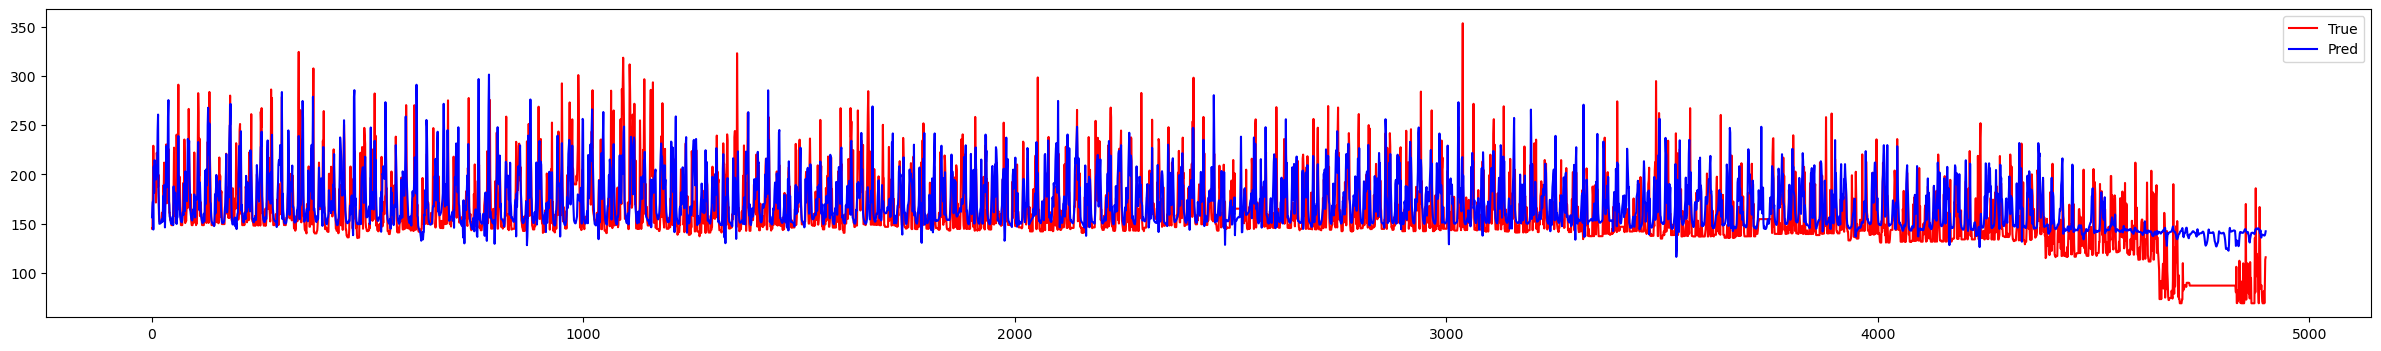

In [63]:
## WATER To GAS
pred_water, real_water, i = show_result('s2s_water_to_gas.h5', testx_gas, testy_gas)

print('MAE : ', round(mean_absolute_error(real_water, pred_water),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_water, pred_water),4))
print('MSE : ', round(mean_squared_error(real_water, pred_water),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_water, pred_water)), 4))
print('MBE : ', round(mean_bias_error(real_water, pred_water), 4))
print('R2 : ', round(r2_score(real_water, pred_water),4))

plt.figure(figsize=(30,4))
plt.plot(real_water, color='red', label='True')
plt.plot(pred_water, color='blue', label='Pred')
plt.legend()
plt.show()

154/154 [==============================] - 2s 7ms/step
MAE :  20.3811
MAPE :  0.1307
MSE :  824.4022
RMSE :  28.7124
MBE :  -5.6444
R2 :  0.2726


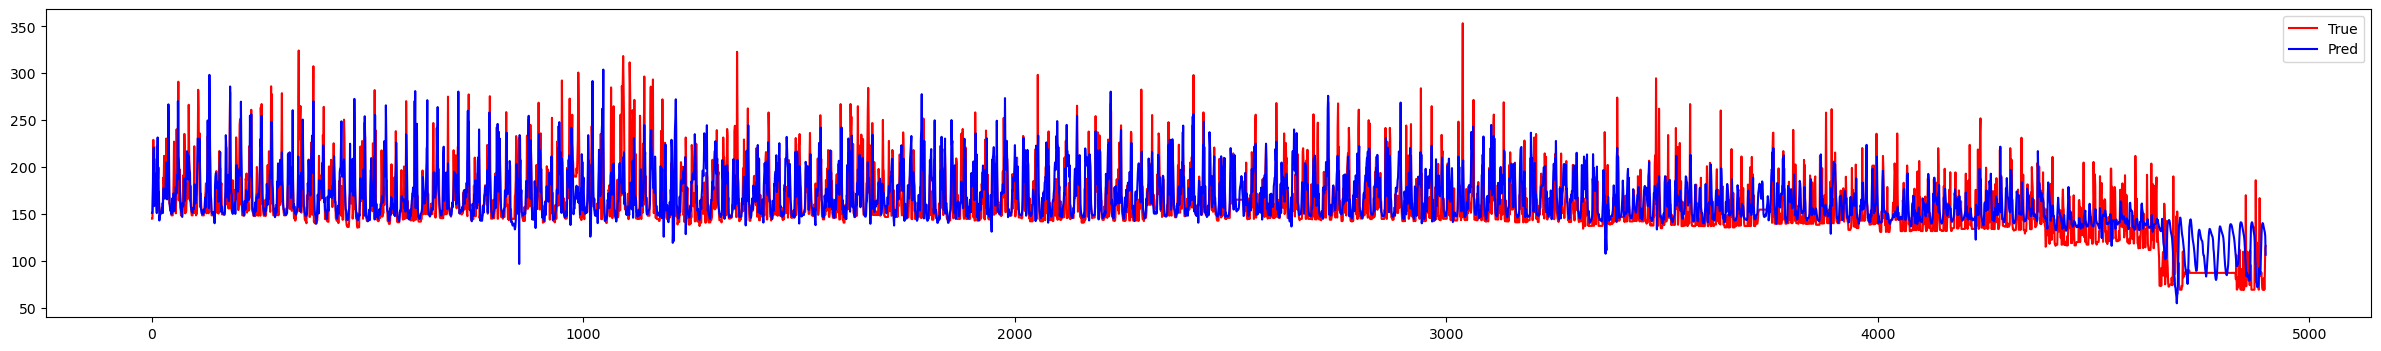

In [64]:
## HOT To GAS
pred_hot, real_hot, i = show_result('s2s_hot_to_gas.h5', testx_gas, testy_gas)

print('MAE : ', round(mean_absolute_error(real_hot, pred_hot),4)) 
print('MAPE : ', round(mean_absolute_percentage_error(real_hot, pred_hot),4))
print('MSE : ', round(mean_squared_error(real_hot, pred_hot),4))
print('RMSE : ', round(np.sqrt(mean_squared_error(real_hot, pred_hot)), 4))
print('MBE : ', round(mean_bias_error(real_hot, pred_hot), 4))
print('R2 : ', round(r2_score(real_hot, pred_hot),4))

plt.figure(figsize=(30,4))
plt.plot(real_hot, color='red', label='True')
plt.plot(pred_hot, color='blue', label='Pred')
plt.legend()
plt.show()